In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from moSlicer import MoSlicer
import moMetrics as MoMetrics

In [2]:
# Set up MoSlicer. 
orbitfile = 'pha20141031.des'
obsfile = 'pha_withChip_allObs.txt'

In [3]:
mos = MoSlicer(orbitfile, Hrange=np.arange(13, 25, 0.5))
mos.readObs(obsfile)
mos.allObs.head()

,objId,delta,ra,dec,magV,time,dradt,ddecdt,phase,solarelon,...,rotSkyPos,filter,finSeeing,fiveSigmaDepth,visitExpTime,solarElong,dmagColor,dmagTrailing,dmagDetect,magFilter
0,0,0.407790,178.554054,7.853689,20.969449,49540.020904,2.528608,-1.748578,85.525555,70.905501,...,4.063771,i,1.030507,23.394825,30,72.496338,-0.291352,0.613400,1.110046,20.678097
1,0,0.407800,178.557465,7.851354,20.969423,49540.022240,2.528674,-1.748536,85.522353,70.908223,...,4.095892,i,0.955558,23.445884,30,69.651283,-0.291352,0.644290,1.166517,20.678071
2,0,0.535783,200.570397,-7.461039,21.186844,49551.046682,1.480196,-1.019487,64.953147,86.517550,...,4.460240,z,1.015369,22.018934,30,86.211137,-0.298076,0.399883,0.668842,20.888769
3,0,0.664376,210.695185,-13.963565,21.584802,49558.967844,1.033271,-0.651569,56.410782,90.570445,...,3.592248,y,1.502535,20.617902,30,91.709672,-0.302563,0.149971,0.170791,21.282239
4,0,1.093462,228.996794,-23.126167,22.704031,49582.055036,0.558375,-0.236947,43.816952,87.775357,...,4.936402,z,0.628552,22.636733,30,87.129406,-0.298076,0.191929,0.246530,22.405955


In [4]:
metricVals = np.empty(mos.slicerShape, dtype='float')
metric = MoMetrics.NObsMetric()
#metric = MoMetrics.DiscoveryMetric()

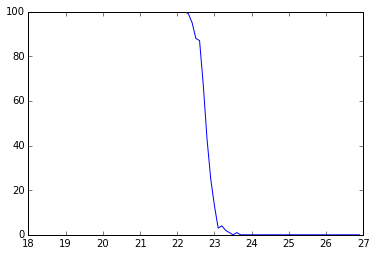

In [5]:
# Check what 'visibility' looks like. 
appMag = np.arange(18, 27, 0.001)
magLim = 22.8
vis = metric._calcVis(appMag, magLim)
bins = np.arange(appMag.min(), appMag.max(), 0.1)
counts = np.zeros(len(bins))
for i, (b1, b2) in enumerate(zip(bins[:-1], bins[1:])):
    counts[i] = len(np.where((appMag >= b1) & (appMag < b2) & (vis==1))[0])
plt.plot(bins, counts)

In [6]:
for i, slicept in enumerate(mos):
    for j, Hval in enumerate(slicept['Hvals']):
        metricVals[i][j] = metric.run(slicept['obs'], Hval, slicept['orb']['H'])

In [7]:
print metricVals

[[ 448.  448.  448. ...,   10.    1.    0.]
 [  58.   58.   58. ...,   28.   24.   14.]
 [ 160.  160.  160. ...,   10.    0.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]]
